In [1]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix
import time
import matplotlib.pyplot as plt

In [2]:
def create_equation(n):
    xs = np.random.randint(-5, 5, size=(n))

    koefs = np.random.randint(-5, 5, size=(n, n))

    while np.linalg.det(koefs) == 0:
        koefs = np.random.randint(-5, 5, size=(n, n))

    b = np.sum(koefs*xs, axis=1)

    return xs.astype("float"), koefs.astype("float"), b.astype("float")

def measure(func, n, runs=100):
    took = []

    for i in range(runs):
        xs, m, b = create_equation(n)

        if func is not np.linalg.solve:
            m = csc_matrix(m)

        ts = time.time()
        s = func(m, b)

        if not np.allclose(s, xs, rtol=1e-03, atol=1e-04):
            continue
        took.append(time.time()-ts)
        
    return np.mean(took), np.median(took), len(took)

In [3]:
methods = [np.linalg.solve, spsolve]
labels = {
    "solve": "přímá",
    "spsolve": "iterativní",
}

mean = {k.__name__:[] for k in methods}
median = {k.__name__:[] for k in methods}
correct = {k.__name__:[] for k in methods}
ns = []

n_max = 162
step = 4

for n in range(2, n_max+1, step):
    for func in methods:
        fmean, fmedian, fcorrect = measure(func, n, runs=1000)
        mean[func.__name__].append(fmean)
        median[func.__name__].append(fmedian)
        correct[func.__name__].append(fcorrect)
    ns.append(n)

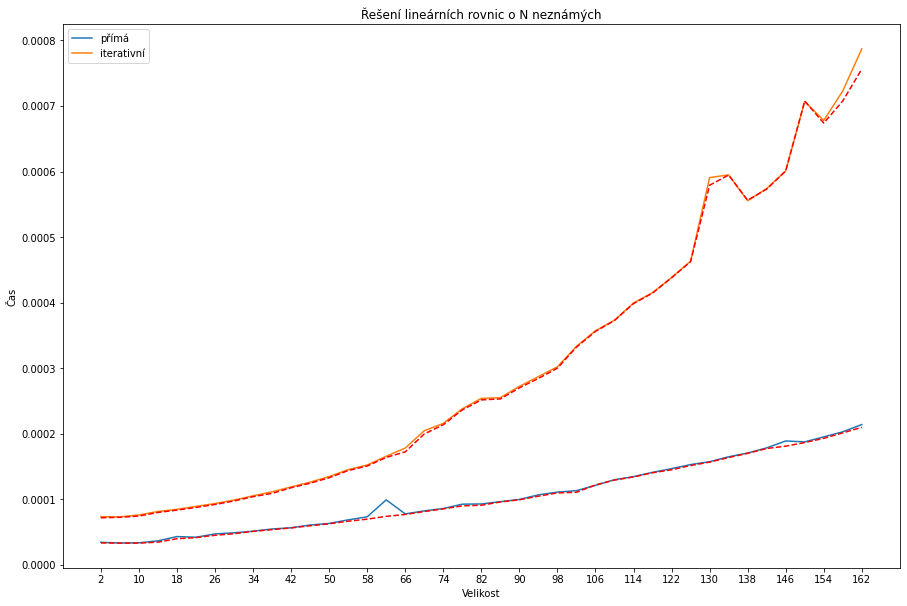

In [4]:
plt.figure(figsize=(15, 10))

for k in mean:
    plt.plot(mean[k], label=labels[k])
    plt.plot(median[k], "--r")

plt.title("Řešení lineárních rovnic o N neznámých")
plt.ylabel("Čas")
plt.xlabel("Velikost")
plt.xticks(range(0, len(ns), 2), ns[::2])
plt.legend()